## Exploring Simulated Pressure and Siesmic Data

### 1. Read in pressure table.

Simulated pressure data are contained in `pressure_SpaceTime.csv`. We have a total of $N = 56448$ injection wells/elements in our data.  <br>

Columns in `pressure_SpaceTime.csv` are the following. <br>
Epoch: Time (s) of pressure measurement <br>
$n$: Pressure (Pa) at different times for well $n$ <br> 
(0 $\leq n \leq N-1$) <br>

Locations (northing, easting, and depth) of different elements are written in `elementXYZ.csv`.

In [1]:
# Load relevant packages.
from orion_light.seismic_catalog import SeismicCatalog
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
# Pressure data
pressure_csv = '../simulated/pressure_SpaceTime.csv'

# Location of injection wells/elements
element_loc_csv = '../simulated/elementXYZ.csv'

In [3]:
elem_coords = pd.read_csv(element_loc_csv)

In [4]:
elem_coords.head(8)

,x,y,z
0,9014.880952,0.048031,-5985.119048
1,9014.880952,0.057952,-5955.357143
2,9014.880952,0.072023,-5925.595238
3,9014.880952,0.084914,-5895.833333
4,9014.880952,0.086870,-5866.071429
5,9014.880952,0.073617,-5836.309524
6,9014.880952,0.083210,-5806.547619
7,9014.880952,0.075494,-5776.785714


Here, x, y, z are the easting, northing, and depth, all measured in meters.

In [5]:
print('No. of elements = %d'% (len(elem_coords)))

No. of elements = 56448


In [6]:
# Read in pressure time series.
pressures = pd.read_csv(pressure_csv)

In [7]:
# Find indices of NaN elements.
idx_nan = np.array(pressures.columns[pressures.isna().any()], dtype=int)

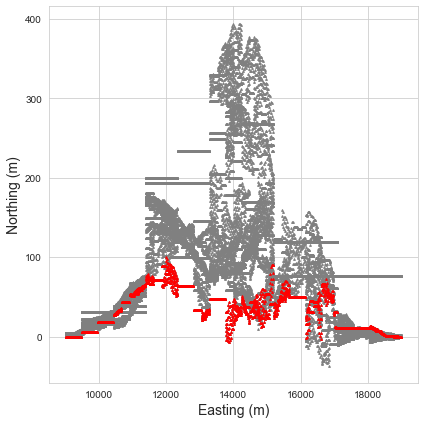

In [8]:
# Plot spatial distribution of simulated elements.
fig = plt.figure(figsize=(6,6))
plt.scatter(elem_coords['x'], elem_coords['y'], c='gray', marker='^', s=3)
plt.scatter(elem_coords.iloc[idx_nan]['x'], elem_coords.iloc[idx_nan]['y'], c='red', marker='^', s=3)
plt.xlabel('Easting (m)', fontsize=14)
plt.ylabel('Northing (m)', fontsize=14)
plt.tight_layout()
plt.show()

Red colors denote elements with NaN pressures.

In [9]:
# Drop NaN elements.
pressures.dropna(axis=1, how='any', inplace=True)
elem_coords.drop(idx_nan, axis=0, inplace=True)

In [10]:
print('No. of elements without NaN pressure data = %d'% (len(pressures.columns)-1))

No. of elements without NaN pressure data = 53760


### 2. Read in seismic data.

In [11]:
# Seismic catalogs
seismic_csv = '../simulated/seismic_catalog.csv'

In [12]:
# Read seismic catalog.
seismic_df = pd.read_csv(seismic_csv)
print('No. of earthquakes in seismic catalog = %d'% (len(seismic_df)))    

No. of earthquakes in seismic catalog = 5233


In [13]:
seismic_df.sort_values(by='epoch', inplace=True)

In [14]:
# Data dictionary
sc_data = {'epoch': np.array(seismic_df['epoch']),
           'magnitude': np.array(seismic_df['magnitude']),
           'easting': np.array(seismic_df['easting']),
           'northing': np.array(seismic_df['northing']),
           'depth': np.array(seismic_df['depth'])
          }

In [15]:
# Create OrionLight SeismicCatalog object.
sc = SeismicCatalog()
sc.load_catalog_dict(sc_data)

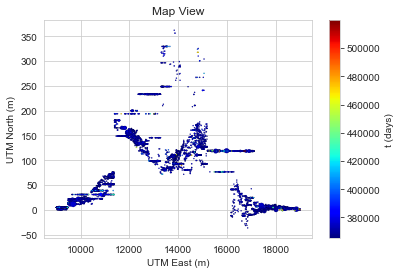

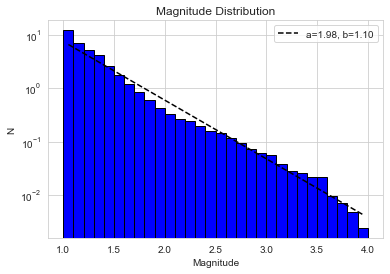

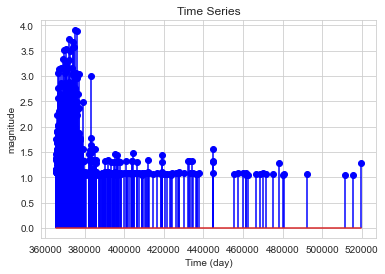

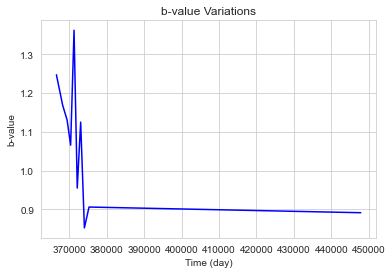

In [16]:
sc.generate_plots()

### 3. Write grand catalog of simulated seismic events.

In [17]:
seismic_df.sample(5, random_state=440)

,epoch,easting,northing,depth,magnitude,seismic_moment,deltaCFS
231,3.168150e+10,16157.738095,118.441736,-2919.642857,1.081896,5.282560e+10,591951.232015
3719,3.229017e+10,10086.309524,30.725643,-5479.166667,1.101152,5.645838e+10,632659.348592
292,3.170484e+10,15264.880952,118.441736,-3217.261905,1.362228,1.391048e+11,551110.465910
4026,3.233504e+10,18985.119048,-0.113023,-3752.976190,1.827980,6.949759e+11,288434.705135
1412,3.194141e+10,9610.119048,21.642583,-2622.023810,1.305009,1.141600e+11,452283.374629


In [18]:
reordered_df = seismic_df[['epoch', 'depth', 'easting', 'northing', 'magnitude']].copy()

In [19]:
reordered_df.sample(5, random_state=440)

,epoch,depth,easting,northing,magnitude
231,3.168150e+10,-2919.642857,16157.738095,118.441736,1.081896
3719,3.229017e+10,-5479.166667,10086.309524,30.725643,1.101152
292,3.170484e+10,-3217.261905,15264.880952,118.441736,1.362228
4026,3.233504e+10,-3752.976190,18985.119048,-0.113023,1.827980
1412,3.194141e+10,-2622.023810,9610.119048,21.642583,1.305009


In [20]:
reordered_df.to_csv('../reordered_dataset/simulated_seismic_reordered.csv', index=None)

## TO DO: 

Plot temporal variation of seismicity rate and median element pressure on the same graph. Look for time lag between seismicity rate and median element pressure.